In [3]:
import HelperFunctions as helper
cities = helper.import_cities('cities.txt')
connections = helper.import_connections('connections.txt')

citiesByIndex = list(cities.values())

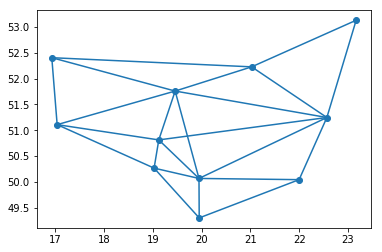

In [5]:
import matplotlib.pyplot as plt

DATA = ((1, 3),
        (2, 4),
        (3, 1),
        (4, 2))
# dash_style =
#     direction, length, (text)rotation, dashrotation, push
# (The parameters are varied to show their effects,
# not for visual appeal).
dash_style = (
    (0, 20, -15, 30, 10),
    (1, 30, 0, 15, 10),
    (0, 40, 15, 15, 10),
    (1, 20, 30, 60, 10),
    )

fig, ax = plt.subplots()

(y, x) = zip(*cities.values())
ax.plot(x, y, 'o')
i = 0
# for name, coords in cities.items():
#     (x, y) = cities[name]
#     (dd, dl, r, dr, dp) = dash_style[i]
    #print('dashlen call %d' % dl)
#     t = ax.text(x, y, str((x, y)), withdash=True,
#                 dashdirection=dd,
#                 dashlength=dl,
#                 rotation=r,
#                 dashrotation=dr,
#                 dashpush=dp,
#                 )
#     i += 1
#     i %= 4


import matplotlib.lines as lines
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms

class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        # we'll update the position when the line data is set
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)

        # we can't access the label attr until *after* the line is
        # inited
        self.text.set_text(self.get_label())

    def set_figure(self, figure):
        self.text.set_figure(figure)
        lines.Line2D.set_figure(self, figure)

    def set_axes(self, axes):
        self.text.set_axes(axes)
        lines.Line2D.set_axes(self, axes)

    def set_transform(self, transform):
        # 2 pixel offset
        texttrans = transform + mtransforms.Affine2D().translate(2, 2)
        self.text.set_transform(texttrans)
        lines.Line2D.set_transform(self, transform)

    def set_data(self, x, y):
        if len(x):
            self.text.set_position((x[-1], y[-1]))

        lines.Line2D.set_data(self, x, y)

    def draw(self, renderer):
        # draw my label at the end of the line with 2 pixel offset
        lines.Line2D.draw(self, renderer)
        self.text.draw(renderer)


# Rysowanie linii.
for conn, distance in connections.items():
    A, B = conn.split(',')
    A = int(A)
    B = int(B)
    y, x = zip(citiesByIndex[A], citiesByIndex[B])
    # print(x, y)
    line = MyLine(x, y, mfc='red', ms=12)
    line.text.set_color('red')
    line.text.set_fontsize(16)
    ax.add_line(line)

plt.show()